### Import

In [1]:
# install Hangul font

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (13.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and direc

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import pandas as pd
import numpy as np

import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings(action='ignore')

### Data Load

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os

# 현재 작업 디렉터리 출력
print(os.getcwd())

data_path = os.path.join(os.getcwd(), 'drive', 'MyDrive', 'Aimers_6th', 'Data')
print(data_path)

/content
/content/drive/MyDrive/Aimers_6th/Data


In [8]:
config = {
    'root': data_path
    , 'train_path': f'{data_path}/train.csv'
    , 'test_path': f'{data_path}/test.csv'
    , 'submit_path': f'{data_path}/sample_submission.csv'
}

In [9]:
def set_seed(seed: int):
    # Set the seed for reproducibility.
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)


def read_data(config):
    # Load training, testing, and submission CSV files
    df_train = pd.read_csv(config['train_path']).drop(columns=['ID'])  # train data
    df_test = pd.read_csv(config['test_path']).drop(columns=['ID'])    # test data
    df_sub = pd.read_csv(config['submit_path'])

    print(f'train data 수: {df_train.shape[0]}')
    print(f'test data 수: {df_test.shape[0]}')
    print(f'submission data 수: {df_sub.shape[0]}')
    return df_train, df_test, df_sub

In [61]:
df_train, df_test, df_sub = read_data(config)

train data 수: 256351
test data 수: 90067
submission data 수: 90067


## EDA

In [62]:
EDA_columns = [column for column in df_train.columns if '불임 원인' in column]
EDA_columns

['남성 주 불임 원인',
 '남성 부 불임 원인',
 '여성 주 불임 원인',
 '여성 부 불임 원인',
 '부부 주 불임 원인',
 '부부 부 불임 원인',
 '불명확 불임 원인',
 '불임 원인 - 난관 질환',
 '불임 원인 - 남성 요인',
 '불임 원인 - 배란 장애',
 '불임 원인 - 여성 요인',
 '불임 원인 - 자궁경부 문제',
 '불임 원인 - 자궁내막증',
 '불임 원인 - 정자 농도',
 '불임 원인 - 정자 면역학적 요인',
 '불임 원인 - 정자 운동성',
 '불임 원인 - 정자 형태']

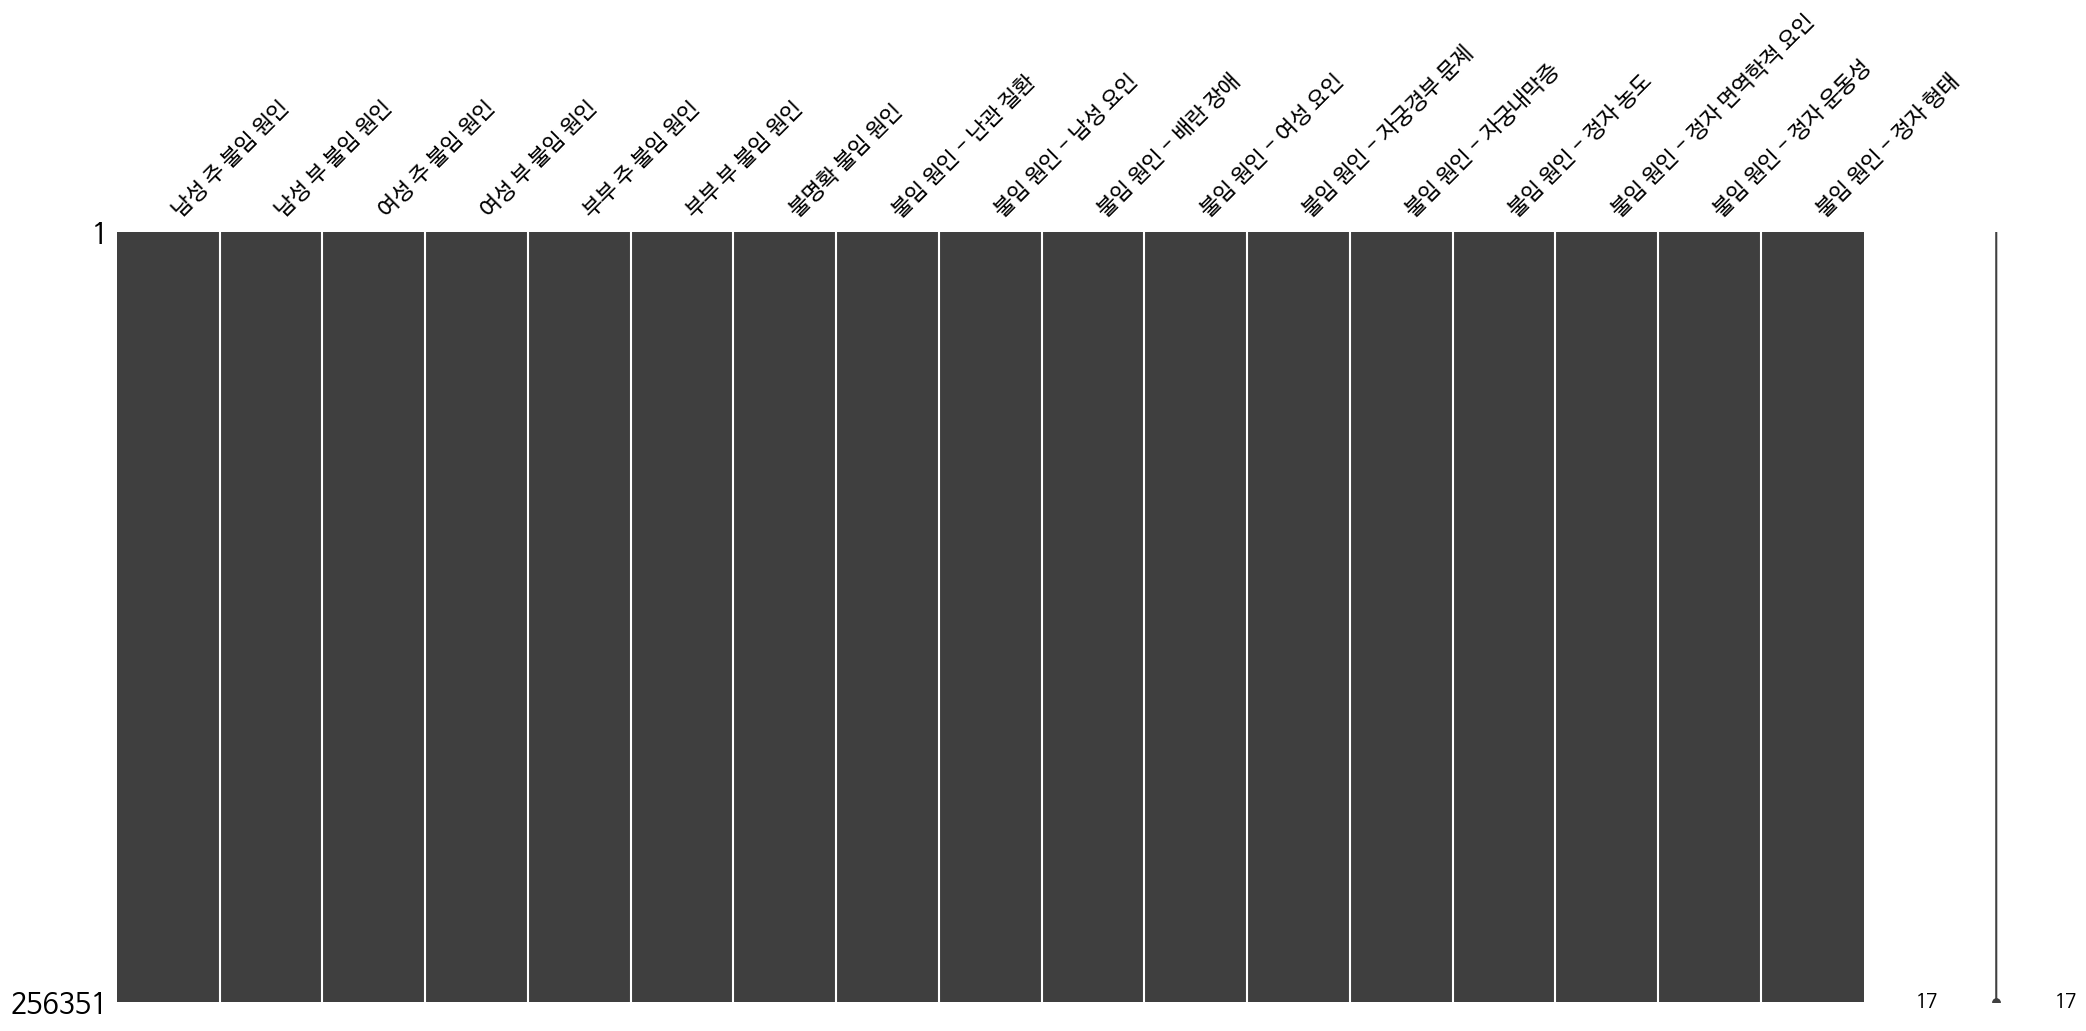

In [12]:
msno.matrix(df_train[EDA_columns])
plt.show()

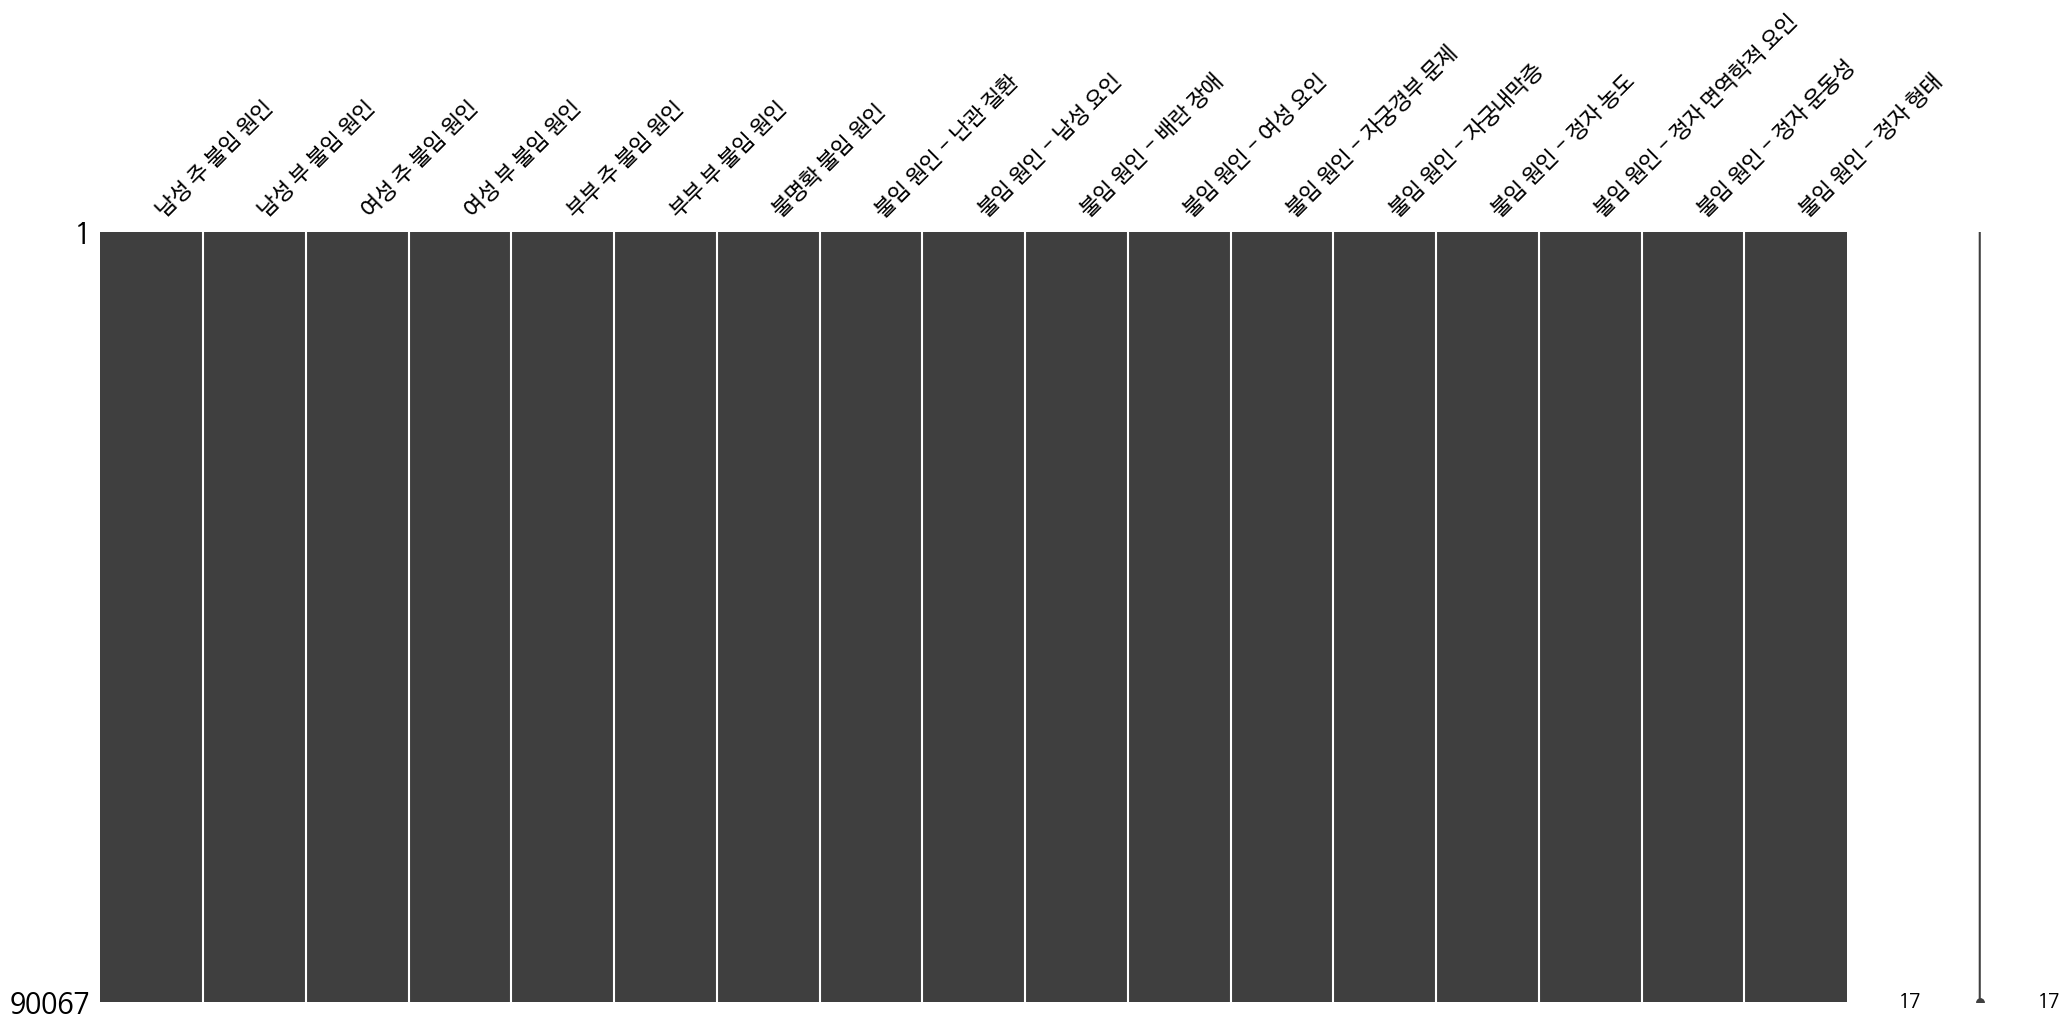

In [14]:
msno.matrix(df_test[EDA_columns])
plt.show()

### 불임 원인 간 상관관계

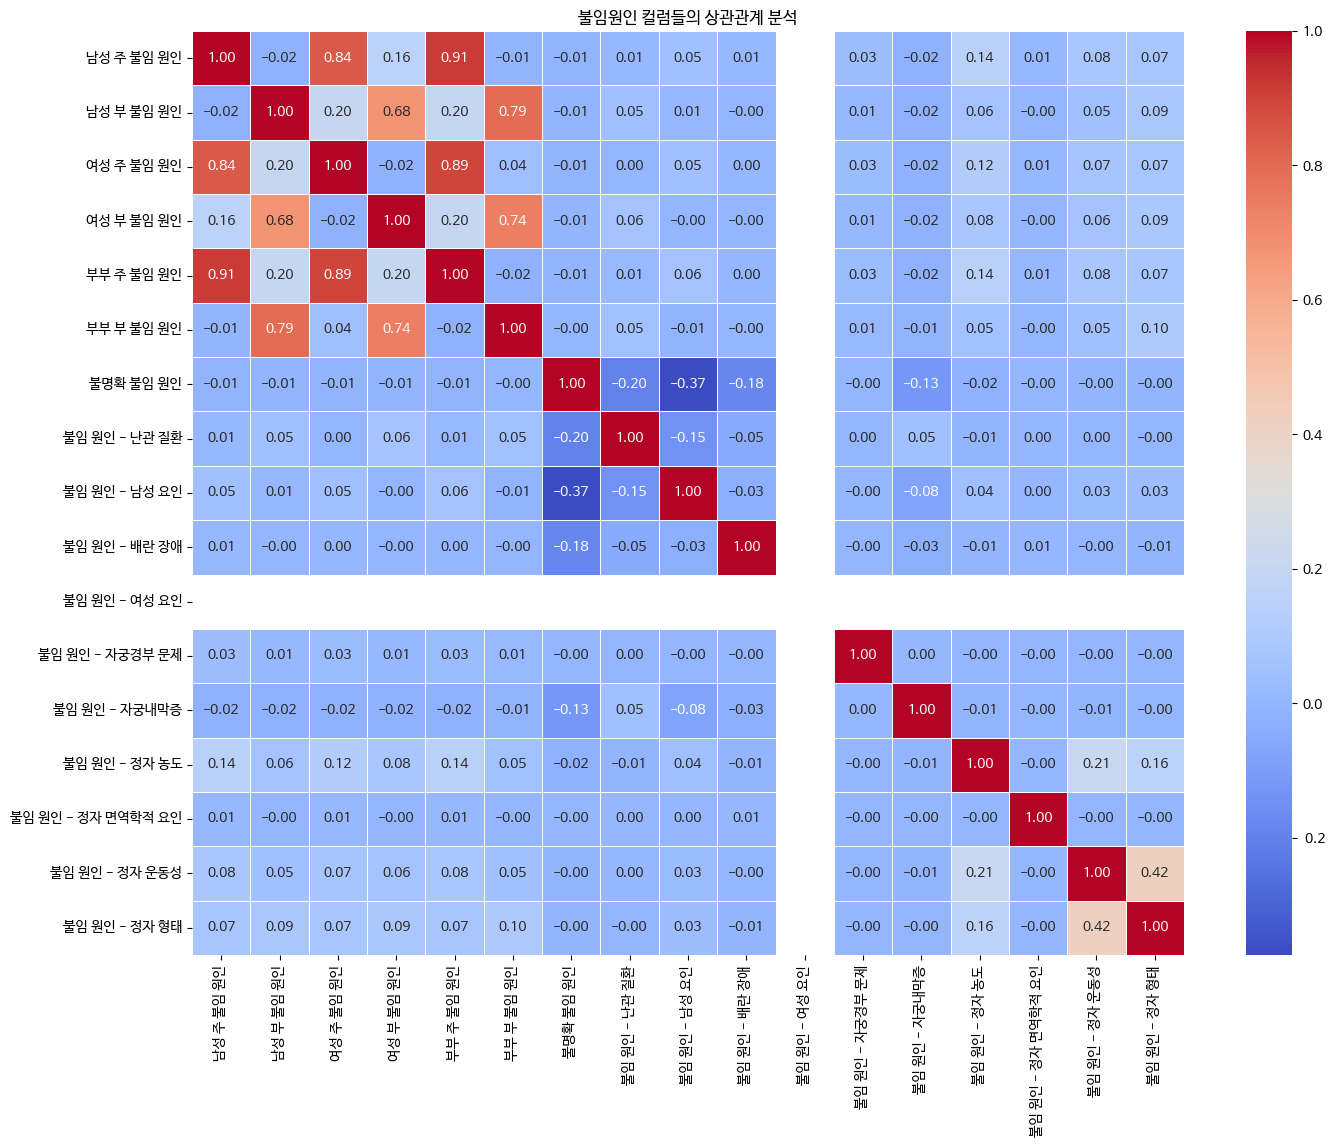

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_train[EDA_columns].corr(), cmap="coolwarm", fmt=".2f", annot = True, linewidths=0.5)
plt.title(f"불임원인 컬럼들의 상관관계 분석")
plt.show()

### 정자 운동성 - 정자 형태 관계

In [54]:
df_train.groupby('불임 원인 - 정자 운동성')['불임 원인 - 정자 형태'].value_counts()

불임 원인 - 정자 운동성  불임 원인 - 정자 형태
0               0                256160
                1                    94
1               1                    49
                0                    48
Name: count, dtype: int64

In [57]:
df_train.groupby('불임 원인 - 정자 형태')['불임 원인 - 정자 운동성'].value_counts()

불임 원인 - 정자 형태  불임 원인 - 정자 운동성
0              0                 256160
               1                     48
1              0                     94
               1                     49
Name: count, dtype: int64

### 정자 농도 - 정자 운동성 - 정자 형태 관계

In [56]:
df_train.groupby(['불임 원인 - 정자 형태', '불임 원인 - 정자 운동성'])['불임 원인 - 정자 농도'].value_counts()

불임 원인 - 정자 형태  불임 원인 - 정자 운동성  불임 원인 - 정자 농도
0              0               0                255922
                               1                   238
               1               0                    42
                               1                     6
1              0               0                    91
                               1                     3
               1               1                    29
                               0                    20
Name: count, dtype: int64

### 주 불임 원인 간 관계

In [66]:
df_train.groupby(['남성 주 불임 원인', '여성 주 불임 원인'])['부부 주 불임 원인'].value_counts()

남성 주 불임 원인  여성 주 불임 원인  부부 주 불임 원인
0           0           0             247298
                        1                288
            1           1                972
                        0                483
1           0           1                866
                        0                 23
            1           1               6351
                        0                 70
Name: count, dtype: int64

In [67]:
df_train.groupby(['여성 주 불임 원인', '남성 주 불임 원인'])['부부 주 불임 원인'].value_counts()

여성 주 불임 원인  남성 주 불임 원인  부부 주 불임 원인
0           0           0             247298
                        1                288
            1           1                866
                        0                 23
1           0           1                972
                        0                483
            1           1               6351
                        0                 70
Name: count, dtype: int64

In [69]:
df_train.groupby(['부부 주 불임 원인', '남성 주 불임 원인'])['여성 주 불임 원인'].value_counts()

부부 주 불임 원인  남성 주 불임 원인  여성 주 불임 원인
0           0           0             247298
                        1                483
            1           1                 70
                        0                 23
1           0           1                972
                        0                288
            1           1               6351
                        0                866
Name: count, dtype: int64

In [70]:
df_train.groupby(['부부 주 불임 원인', '여성 주 불임 원인'])['남성 주 불임 원인'].value_counts()

부부 주 불임 원인  여성 주 불임 원인  남성 주 불임 원인
0           0           0             247298
                        1                 23
            1           0                483
                        1                 70
1           0           1                866
                        0                288
            1           1               6351
                        0                972
Name: count, dtype: int64

#### 성별 주 불임 원인 1일 때 부부 주 불임 원인으로 이어지는 경우 많음 -> 남성, 여성 주 불임원인 제거

### 부 불임 원인 간 관계

In [68]:
df_train.groupby(['남성 부 불임 원인', '여성 부 불임 원인'])['부부 부 불임 원인'].value_counts()

남성 부 불임 원인  여성 부 불임 원인  부부 부 불임 원인
0           0           0             252010
                        1                 22
            1           0                918
                        1                 39
1           0           0                894
                        1                238
            1           1               1948
                        0                282
Name: count, dtype: int64

### 남성, 여성 둘다 부 불임 원인 갖고 있을 때 부부 불임 원인 확률 높음